Here we will run the VQE algorithm from `Hydrogen\ Atom.ipynb` and see how errors on QPUs can affect the final result. 

H .0 .0 .0; H .0 .0 0.1; Time: 8.106231689453125e-06 seconds since start


/var/folders/81/jsls3ctx2pq2v1djrvb29bjh0000gn/T/ipykernel_76886/1792243489.py:39: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


H .0 .0 .0; H .0 .0 0.11836734693877551; Time: 0.22561192512512207 seconds since start
H .0 .0 .0; H .0 .0 0.13673469387755102; Time: 0.28347301483154297 seconds since start
H .0 .0 .0; H .0 .0 0.15510204081632656; Time: 0.34050512313842773 seconds since start
H .0 .0 .0; H .0 .0 0.17346938775510207; Time: 0.4460790157318115 seconds since start
H .0 .0 .0; H .0 .0 0.19183673469387758; Time: 0.5039069652557373 seconds since start
H .0 .0 .0; H .0 .0 0.21020408163265308; Time: 0.5600512027740479 seconds since start
H .0 .0 .0; H .0 .0 0.2285714285714286; Time: 0.6159110069274902 seconds since start
H .0 .0 .0; H .0 .0 0.2469387755102041; Time: 0.6734471321105957 seconds since start
H .0 .0 .0; H .0 .0 0.2653061224489796; Time: 0.7302839756011963 seconds since start
H .0 .0 .0; H .0 .0 0.2836734693877551; Time: 0.7896480560302734 seconds since start
H .0 .0 .0; H .0 .0 0.3020408163265306; Time: 0.8488249778747559 seconds since start
H .0 .0 .0; H .0 .0 0.3204081632653062; Time: 0.90887117

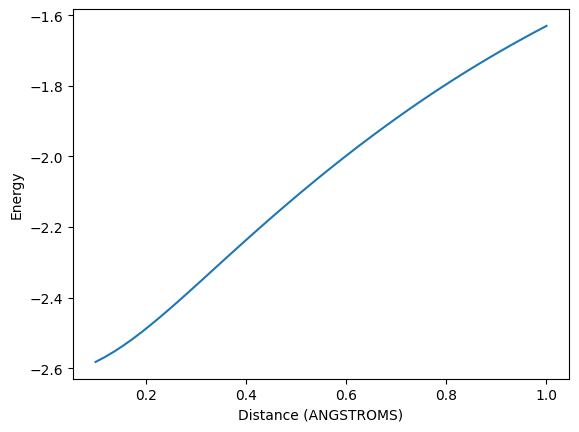

In [1]:
#Normal

from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
import numpy as np
import time

start = time.time()
end = time.time()
energies = []
distances = np.linspace(0.1,1,50)
for i in distances:
    seconds = end - start
    print(f'H .0 .0 .0; H .0 .0 {i}; Time: {seconds} seconds since start')
    # Use PySCF, a classical computational chemistry software
    # package, to compute the one-body and two-body integrals in
    driver = PySCFDriver(
    atom=f'H .0 .0 .0; H .0 .0 {i}',
    unit=DistanceUnit.ANGSTROM,
    basis='sto3g',
    charge=0,
    spin=0  
)
    problem = driver.run()

# setup the qubit mapper
    from qiskit_nature.second_q.mappers import ParityMapper

    mapper = ParityMapper(num_particles=problem.num_particles)

# setup the classical optimizer for the VQE
    from qiskit_algorithms.optimizers import L_BFGS_B

    optimizer = L_BFGS_B()

# setup the estimator primitive for the VQE
    from qiskit.primitives import Estimator

    estimator = Estimator()

# setup the ansatz for VQE
    from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD

    ansatz = UCCSD(
    problem.num_spatial_orbitals,
    problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        problem.num_spatial_orbitals,
        problem.num_particles,
        mapper,
    ),
)

# set up our actual VQE instance
    from qiskit_algorithms import VQE

    vqe = VQE(estimator, ansatz, optimizer)
# ensure that the optimizer starts in the all-zero state which corresponds to
# the Hartree-Fock starting point
    vqe.initial_point = [0] * ansatz.num_parameters

# prepare the ground-state solver and run it
    from qiskit_nature.second_q.algorithms import GroundStateEigensolver

    algorithm = GroundStateEigensolver(mapper, vqe)

    electronic_structure_result = algorithm.solve(problem)
    electronic_structure_result.formatting_precision = 6
    energies.append(electronic_structure_result.groundenergy)
    end = time.time()

#Plotting energies

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(distances, energies)
ax.set_xlabel("Distance (ANGSTROMS)")
ax.set_ylabel("Energy")
plt.draw()

H .0 .0 .0; H .0 .0 0.1; Time: 1.0967254638671875e-05 seconds since start
H .0 .0 .0; H .0 .0 0.11836734693877551; Time: 2.847141742706299 seconds since start
H .0 .0 .0; H .0 .0 0.13673469387755102; Time: 5.205497980117798 seconds since start
H .0 .0 .0; H .0 .0 0.15510204081632656; Time: 7.680497884750366 seconds since start
H .0 .0 .0; H .0 .0 0.17346938775510207; Time: 9.877531051635742 seconds since start
H .0 .0 .0; H .0 .0 0.19183673469387758; Time: 12.735628843307495 seconds since start
H .0 .0 .0; H .0 .0 0.21020408163265308; Time: 15.838501691818237 seconds since start
H .0 .0 .0; H .0 .0 0.2285714285714286; Time: 18.040411710739136 seconds since start
H .0 .0 .0; H .0 .0 0.2469387755102041; Time: 20.65546178817749 seconds since start
H .0 .0 .0; H .0 .0 0.2653061224489796; Time: 23.35144591331482 seconds since start
H .0 .0 .0; H .0 .0 0.2836734693877551; Time: 26.269579887390137 seconds since start
H .0 .0 .0; H .0 .0 0.3020408163265306; Time: 28.98804497718811 seconds sinc

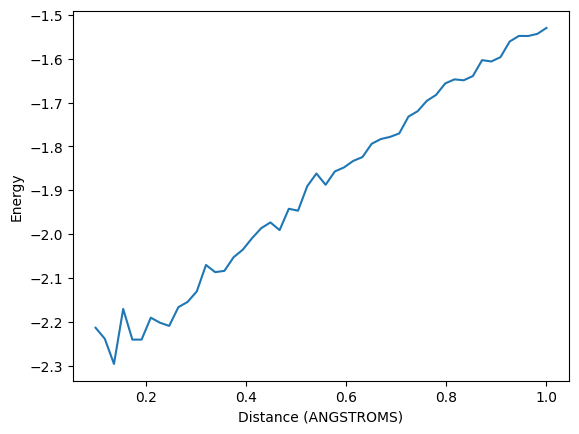

In [14]:
# Error

#Normal

from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_ibm_runtime.fake_provider import FakeQuitoV2 
import numpy as np
import time


# setup the classical optimizer for the VQE
from qiskit_algorithms.optimizers import L_BFGS_B

optimizer = L_BFGS_B()

# setup the estimator primitive for the VQE
from qiskit_aer.primitives import Estimator
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime.fake_provider import FakeFez
backend = FakeQuitoV2()
noise_model = NoiseModel.from_backend(backend)
simulator = AerSimulator(noise_model=noise_model)
estimator = Estimator(
    backend_options = dict(
        noise_model= noise_model,
))


start = time.time()
end = time.time()
energies = []
distances = np.linspace(0.1,1,50)
for i in distances:
    seconds = end - start
    print(f'H .0 .0 .0; H .0 .0 {i}; Time: {seconds} seconds since start')
    # Use PySCF, a classical computational chemistry software
    # package, to compute the one-body and two-body integrals in
    driver = PySCFDriver(
    atom=f'H .0 .0 .0; H .0 .0 {i}',
    unit=DistanceUnit.ANGSTROM,
    basis='sto3g',
    charge=0,
    spin=0  
)
    problem = driver.run()

# setup the qubit mapper
    from qiskit_nature.second_q.mappers import ParityMapper

    mapper = ParityMapper(num_particles=problem.num_particles)

# setup the ansatz for VQE
    from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD

    ansatz = UCCSD(
    problem.num_spatial_orbitals,
    problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        problem.num_spatial_orbitals,
        problem.num_particles,
        mapper,
    ),
)

# set up our actual VQE instance
    from qiskit_algorithms import VQE

    vqe = VQE(estimator, ansatz, optimizer)
# ensure that the optimizer starts in the all-zero state which corresponds to
# the Hartree-Fock starting point
    vqe.initial_point = [0] * ansatz.num_parameters

# prepare the ground-state solver and run it
    from qiskit_nature.second_q.algorithms import GroundStateEigensolver

    algorithm = GroundStateEigensolver(mapper, vqe)

    electronic_structure_result = algorithm.solve(problem)
    electronic_structure_result.formatting_precision = 6
    energies.append(electronic_structure_result.groundenergy)
    end = time.time()

#Plotting energies

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(distances, energies)
ax.set_xlabel("Distance (ANGSTROMS)")
ax.set_ylabel("Energy")
plt.draw()

Sources: https://docs.quantum.ibm.com/guides/simulate-with-qiskit-aer, https://qiskit.github.io/qiskit-aer/tutorials/3_building_noise_models.html, https://docs.quantum.ibm.com/guides/simulate-with-qiskit-aer

So as you may now notice, the line is no longer smooth, rather its now bumpy with many ups and downs. These are due to errors that may cause the algorithm to determine energies higher or lower than the actual value. Overall, however, the line does stay steady with the expected values on the other line.